In [ ]:
def closest_bus_stop_v1(a, b):
    c = a / b
    c = round(c)
    return abs(a - b*c)

def closest_bus_stop_v2(x, p):
    return min(x % p, p - x % p)

tests = ((870, 200), (490, 48), (450, 100), (600, 150), (5, 4), (7, 4), (1276, 847), (1499, 1000), (0, 10))
for t in tests:
    print(t, closest_bus_stop_v1(*t), closest_bus_stop_v2(*t))

(870, 200) 70 70
(490, 48) 10 10
(450, 100) 50 50
(600, 150) 0 0
(5, 4) 1 1
(7, 4) 1 1
(1276, 847) 418 418
(1499, 1000) 499 499
(0, 10) 0 0


In [ ]:
def quad_eq(a, b, c) -> list[float|int]:
    from math import sqrt
    if a == 0:
        if b != 0:
            return [round(-c/b, 3)]
        else:
            return []
    else:
        D = b**2 - 4*a*c
        if D < 0:
            return []
        if D > 0:
            D_sqrt = sqrt(D)
            return [round((-b+D_sqrt)/(2*a),3), round((-b-D_sqrt)/(2*a),3)]
        if D == 0:
            return [round(-b/(2*a),3)]
tests = [
    (1,-1,-1),
    (1, 2, 1),
    (1,4,4),
    (1,-4,4),
    (4, 6, 10),
    (0, 2, -8),
    (0, 0, 1),
    (325, -55, -124),
    (1, 5, -6)
]
for t in tests:
    print(t, quad_eq(*t))


In [ ]:
def add_fractions(frac1, frac2):
    from math import gcd
    top = frac1[0]*frac2[1] + frac1[1]*frac2[0]
    bot = frac1[1]*frac2[1]
    div = gcd(top, bot)
    return top//div, bot//div

In [ ]:
x = (1, 6)
y = (1, 3)
add_fractions(x, y)

(1, 2)

In [ ]:
import re
pattern = re.compile(r'(\d+)([+/\-*])(\d+)')

def calc(prompt: str) -> int | float:
    search_result = pattern.search(prompt)
    left_, op, right_ = search_result.groups()
    left = int(left_)
    right = int(right_)
    if op == '+':
        return left + right
    elif op == '-':
        return left - right
    elif op == '*':
        return left * right
    else:
        return left/right

def calc2(prompt: str) -> int|float:
    opers = {'+', '-', '*', '/'}
    for op in opers:
        if op in prompt:
            left, right = map(int, prompt.split(op))
            break
    if op == '+':
        return left + right
    elif op == '-':
        return left - right
    elif op == '*':
        return left * right
    else:
        return left/right

In [ ]:
def is_valid_phone_number(s):
    import re
    pattern1 = re.compile(r'(8|\+7)\ \(\d{3}\)\ \d{3}-\d{2}-\d{2}')
    pattern2 = re.compile(r'8\d{10}')
    return bool(pattern1.match(s) or pattern2.match(s))
phone_numbers = [
    '89053159548',
    '8 (234) 234-43-43',
    '+7 (123) 123-12-23',
    '8 123 123-12-12'
]
for pn in phone_numbers:
    print(pn, is_valid_phone_number(pn))

In [ ]:
def is_id(s):
    from string import ascii_letters
    if not s or s[0] in '0123456789':
            return False
    alphnum = set(ascii_letters + '0123456789' + '_')
    return all(ch in alphnum for ch in s)

def is_identifier(a):
    if a[0] in "1234567890":
        return False
    for el in a:
        if el == " " or el == "-":
            return False
    return True

tests = ['jhgb234', '23dfs', '', '_df23', '(adqw', ' ', 'abc-def', 'ab cd', 'A', 'AB_CEDa356']
for t in tests:
    print(t, is_id(t), t.isidentifier())

jhgb234 True True
23dfs False False
 False False
_df23 True True
(adqw False False
  False False
abc-def False False
ab cd False False
A True True
AB_CEDa356 True True


In [3]:
from string import ascii_uppercase

'''
Global variables (optional):
'''
UPPER_SET = set(ascii_uppercase)
SPECIAL_SET = set('!-+/*&%$#_@()[]')
DIGITS_SET = set('0123456789')


def passes_length(password: str) -> bool:
    return len(password) >= 10


def passes_capital_chars(password: str) -> bool:
    return sum(ch in UPPER_SET for ch in password) >= 2


def passes_special_symbols(password: str) -> bool:
    return bool(set(password) & SPECIAL_SET)


def passes_digits(password: str) -> bool:
    return sum(ch in DIGITS_SET for ch in password) >= 3


def is_valid_password(password: str) -> bool:
    '''
    The password is valid if at least 3 of the 4 following conditions are true:
    1. len >= 10
    2. at least two capital letters
    3. at least one special symbol from !-+/*&%$#_@()[]
    4. at least three digits
    '''
    return sum((
        passes_length(password),
        passes_capital_chars(password),
        passes_special_symbols(password),
        passes_digits(password)
    )) >= 3
    

# TESTING
print('--- STARTED TESTING ---')
assert all(passes_length(pwd) == ans for pwd, ans in zip(
        ['acd748ghc', '1yd758gja1', '473hdjqudhfgn'], 
        [False, True, True])
    ), 'passes_length failed'
print('passes_length passed')

assert all(passes_special_symbols(pwd) == ans for pwd, ans in zip(
        ['acd8ghc', '1yd7_Bgja1', '$', '7f!67@2G'], 
        [False, True, True, True])
    ), 'passes_special_symbols failed'
print('passes_special_symbols passed')

assert all(passes_capital_chars(pwd) == ans for pwd, ans in zip(
        ['acd7#$48ghc', '1yd7_Bgja1', 'aqwBqsgF_', '7f67AiBiu2G'], 
        [False, False, True, True])
    ), 'passes_capital_chars failed'
print('passes_capital_chars passed')

assert all(passes_digits(pwd) == ans for pwd, ans in zip(
        ['acd7#$ghc', '1yd_Bgja', 'aqw2Bqs5gF_', '7f67AiBiu2G', 'hjshgdf7hg16ghd6'], 
        [False, False, False, True, True])
    ), 'passes_digits failed'
print('passes_digits passed')
print('--- FINISHED TESTING ---')
# END OF TESTING


'''
Uncomment this to run the code
'''
TESTS = ['iuhkQe82jGa', 'Aiq3uyf3G1', 'ruQ-1d4G', 'qkqFDuQh4FG3FG', '2$A48bc753']
for t in TESTS:
    print(t, is_valid_password(t))


--- STARTED TESTING ---
passes_length passed
passes_special_symbols passed
passes_capital_chars passed
passes_digits passed
--- FINISHED TESTING ---
iuhkQe82jGa False
Aiq3uyf3G1 True
ruQ-1d4G False
qkqFDuQh4FG3FG False
2$A48bc753 True


In [ ]:
def network_adress(netw_id: str, mask: str) -> str:
    return '.'.join(map(lambda x: str(int(x[0]) & int(x[1])), zip(netw_id.split('.'), mask.split('.'))))

In [ ]:
import math
def angle(a,b,c):
    # angle between a and b in (a,b,c) triangle
    return math.acos((a**2 + b**2 - c**2)/(2*a*b))

def is_triangle(c,b,a):
    # a <= b <= c
    return a + b > c

def minimum_angle(a,b,c):
    sides_sorted = sorted((a,b,c), reverse=True)
    if not is_triangle(*sides_sorted):
        return 0
    return angle(*sides_sorted)

tests = [
    (2, 3, 4),
    (8, 4, 5),
    (2, 1, math.sqrt(3)),
    (3, 10, 4),
    (4, 5, 5),
    (5, 4, 4),
    (1, 1, 1)
]
for t in tests:
    print(t, f'{minimum_angle(*t) * 180/math.pi:.3f}')

(2, 3, 4) 28.955
(8, 4, 5) 24.147
(2, 1, 1.7320508075688772) 30.000
(3, 10, 4) 0.000
(4, 5, 5) 47.156
(5, 4, 4) 51.318
(1, 1, 1) 60.000


# Loops and different data types

In [ ]:
def fizzbuzz_boring(n: int) -> None:
    for i in range(1, n):
        if i % 3 == 0 and i % 5 == 0:
            print('FizzBuzz')
        elif i % 3 == 0:
            print('Fizz')
        elif i % 5 == 0:
            print('Buzz')
        else:
            print(i)

def fizzbuzz_flex(n: int) -> None:
    print('\n'.join('Fizz' * (i % 3 == 0) + 'Buzz' * (i % 5 == 0) if not (i % 3 and i % 5) else str(i) for i in range(1, n)))

In [ ]:
def smart_range(s: str) -> list:
    res = []
    for rng in s.split(','):
        if '-' in rng:
            dash = rng.find('-')
            res.extend(range(int(rng[:dash]), int(rng[dash+1:])+1))
        else:
            res.append(int(rng))
    return res

In [ ]:
def houses(colors: list[int]) -> int:
    return sum(map(lambda x: x[0]==x[1], zip(colors[:-2], colors[2:])))

In [ ]:
def gcd_function(a: int, b: int) -> int:
    # the greatest common divisor function based on the Euclidean algorithm
    while b != 0:
        a, b = b, a % b
    return a

In [ ]:
def numbers_in_str(s: str) -> int:
    return sum(map(int, s.split()))

In [ ]:
def linspace_v1(a: float, b: float, N: int) -> list[float]:
    return [a + i*(b-a)/(N-1) for i in range(N)]

def linspace_v2(a, b, N):
    res = [float(a)]
    d = (b - a)/(N-1)
    for _ in range(N-1):
        res.append(res[-1] + d)
    return res
# ---
def lins_v1(a, b, N):
    d = (b - a)/(N-1)
    c = 0
    result = []
    for i in range(1,N+1):
        c = a + d
        a+=d
        result.append(c-d)
    return result
def lins_v2(a, b, N):
    d = (b - a)/(N-1)
    result = [a]
    for i in range(N-1):
        result.append(result[-1]+d)
    return result


In [ ]:
def add_fractions(frac1, frac2):
    from math import gcd
    top = frac1[0]*frac2[1] + frac1[1]*frac2[0]
    bot = frac1[1]*frac2[1]
    div = gcd(top, bot)
    return top//div, bot//div
def nth_harmonic(n) -> tuple[int, int]:
    res = (0,1)
    for i in range(1, n+1):
        res = add_fractions(res, (1, i))
    return res


In [ ]:
def collatz(n: int) -> int:
    res = 0
    while n != 1:
        n = n//2 if n % 2 == 0 else 3 * n + 1
        res += 1
    return res

def mycache(func):
    data = {}
    def wrapper(n):
        if n in data:
            return data[n]
        result = func(n)
        data[n] = result
        return result
    return wrapper

@mycache # or @functools.cache
def collatz_rec(n):
    if n == 1:
        return 0
    return 1 + collatz_rec(n//2 if n % 2 == 0 else 3 * n + 1)

# sum of all collatz(n) for n in range(2, N+1)

def collatz_sum_v1(N=100_000):
    s = 0
    for el in range(2, N+1):
        s += collatz(el)
    return s

def collatz_sum_v2(N=100_000):
    def collatz_non_rec(n):
        orig = int(n)
        res = 0
        while n!=1:
            if n in data:
                res += data[n]
                data[orig] = res
                return res
            else:
                n = n//2 if n % 2 == 0 else 3 * n + 1
                res += 1
        data[orig] = res
        return res
    data = {}
    s = 0
    for el in range(2, N+1):
        s += collatz_non_rec(el)
    return s, data

def collatz_sum_v3(N=100_000):
    s = 0
    for el in range(2, N+1):
        s += collatz_rec(el)
    return s
# ---
def collatz_azat(a):
    N = 0
    while a!=1:
        if a%2==0:
            a = a/2
        else:
            a = 3 * a + 1
        N+=1
    return N


In [ ]:
def decimal_expansion(denom: int):
    num = 10
    res = ''
    for _ in range(40):
        res += str(num // denom)
        num = 10 * (num % denom)
    return res

def drobi(a):
    b = ""
    f = 1
    de = 1
    for i in range(1, 16):
        f = f % a
        f = f*10
        de = f // a
        b+=str(de)
    return b

tests = [7, 3, 5, 11, 101, 3576, 99**2]
for t in tests:
    print(t, decimal_expansion(t), drobi(t))


7 1428571428571428571428571428571428571428 142857142857142
3 3333333333333333333333333333333333333333 333333333333333
5 2000000000000000000000000000000000000000 200000000000000
11 0909090909090909090909090909090909090909 090909090909090
101 0099009900990099009900990099009900990099 009900990099009
3576 0002796420581655480984340044742729306487 000279642058165
9801 0001020304050607080910111213141516171819 000102030405060


In [ ]:
def unique_symbols(s) -> str:
    ALPH_SET = set('abcdefghijklmnopqrstuvwxyz')
    non_alph = set()
    alph = set()
    for ch in s:
        if ch not in ALPH_SET:
            non_alph.add(ch)
        else:
            alph.add(ch)
    return ''.join(non_alph) + ''.join(alph)

unique_symbols(r'j%***qh44f%lsqwe5jf6hur1')

In [ ]:
def make_counter(vals: list[int | str]) -> dict[int | str, int]:
    res = {v: 0 for v in set(vals)}
    for el in vals:
        res[el] += 1
    return res

In [ ]:
def first3_times_last5_v1(a: list[int]) -> int:
    return next(filter(lambda x: x % 3 == 0, a)) * next(filter(lambda x: x % 5 == 0, reversed(a)))

def first3_times_last5_v2(a) -> int:
    res = 1
    for el in a:
        if el % 3 == 0:
            res *= el
            break
    for el in reversed(a):
        if el % 5 == 0:
            res *= el
            break
    return res

In [ ]:
def contains_repeating_ids(entries: list[dict[int, str]]) -> bool:
    ids = [el['id'] for el in entries]
    return len(ids) != len(set(ids))

In [ ]:
def first_repetition(nums) -> int:
    elements = set()
    for i, el in enumerate(nums):
        if el in elements:
            return i
        elements.add(el)
    return -1

def first_repetition_harder(nums: list):
    last_seen_index = dict()
    for i, el in enumerate(nums):
        if (index := last_seen_index.get(el, None)) is None:
            last_seen_index[el] = i
        else:
            return index
    return -1

In [ ]:
def is_power(a: int) -> bool:
    from math import log, sqrt
    # O(sqrt(n)*log(n)) complexity?
    for base in range(2, sqrt(a)+1):
        for power in range(2, int(log(a, base))+1):
            if base**power == a:
                return True
    return False

In [ ]:
def number_of_tips_v1(guests: list[int]) -> int:
    def gcd_function(a: int, b: int) -> int:
        while b != 0:
            a, b = b, a % b
        return a    
    def lcm(a: int, b: int) -> int:
        return a*b//gcd_function(a, b)
    result = lcm(guests[0], guests[1])
    for num_guests in guests[2:]:
        result = lcm(num_guests, result)
    return result

def number_of_tips_v2(guests: list[int]) -> int:
    from math import lcm
    return lcm(*guests)

In [ ]:
def cumsum_v1(a: list) -> list:
    res = [a[0]]
    for el in a[1:]:
        res.append(res[-1] + el)
    return res

def cumsum_v2(a: list) -> list:
    return [sum(a[:i]) for i in range(1, len(a) + 1)]

def cumsum_v3(a: list) -> list:
    from itertools import accumulate
    return list(accumulate(a))
# ---
def summ(a):
    temp = 0 
    b = []
    for i in a:
        sum1 = i + temp
        temp = sum1
        b.append(sum1)
    return b


In [ ]:
def matrix_maximum(M: list[list[int]]) -> tuple[int, int]:
    import numpy as np
    MM = np.array(M)
    return max(np.sum(MM, axis=0)), max(np.sum(MM, axis=1))
M = [
    [1,4,6],
    [2,1,7],
    [-4,1,-4]
]
matrix_maximum(M)

In [ ]:
def random_license_plate() -> str:
    from random import choice, randrange
    letters = 'ETOPAHKCBMX'
    return f'{choice(letters)} {randrange(1, 1000):03d} {choice(letters)}{choice(letters)}'

In [ ]:
def balls_and_baskets(vals):
    for v1, v2 in zip(vals[:-1], vals[1:]):
        if v2 < v1:
            return -1
    return vals[-1] - vals[0]
print(balls_and_baskets([0,1,1,2,3,5]))
print(balls_and_baskets([1,1,2,4,3,3]))

In [ ]:
# sorting comparison
def merge(arr1, arr2):
    res = []
    i, j = 0, 0
    len1, len2 = len(arr1), len(arr2)
    while i < len1 and j < len2:
        if arr1[i] < arr2[j]:
            res.append(arr1[i])
            i+=1
        else:
            res.append(arr2[j])
            j+=1
    if i == len1:
        res += arr2[j:]
    if j == len2:
        res += arr1[i:]
    return res

def merge_sort(arr):
    if len(arr) == 1:
        return arr
    mid = len(arr)//2
    return merge(merge_sort(arr[:mid]), merge_sort(arr[mid:]))

def bubble_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        for j in range(len(a) - i):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
    return a

import random
def get_random_list(length: int):
    return [round(random.random(), 5) for _ in range(length)]

ns = 10, 70, 400, 1500, 5000, 20000

# time testing bubble
print('bubble sort')
for n in ns:
    print(n, end=': ')
    a = get_random_list(n)
    %timeit bubble_sort(a)

# time testing merge
print('merge sort')
for n in ns:
    print(n, end=': ')
    a = get_random_list(n)
    %timeit merge_sort(a)

# time testing built-in
print('built-in sort')
for n in ns:
    print(n, end=': ')
    a = get_random_list(n)
    %timeit sorted(a)

bubble sort
10: 14 µs ± 3.39 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
70: 457 µs ± 3.83 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
400: 17.1 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
1500: 243 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5000: 3.03 s ± 488 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20000: 50.7 s ± 33.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
merge sort
10: 24.5 µs ± 562 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
70: 231 µs ± 6.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
400: 1.77 ms ± 367 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1500: 6.81 ms ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5000: 25.1 ms ± 472 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
20000: 132 ms ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
def find_root(function, a, b):
    c = (a+b)/2
    while abs(function(c)) > 1e-3:
        if function(a)*function(c) < 0:
            b = c
        else:
            a = c
        c = (a+b)/2
    return round(c,3)

In [6]:
def displayed_digit(bits):
    digits = {
        0: '1111110',
        1: '0110000',
        2: '1101101',
        3: '1111001',
        4: '0110011',
        5: '1011011',
        6: '1011111',
        7: '1110000',
        8: '1111111',
        9: '1111011'
    }
    powers_of_2 = {2**i: 'abcdefg'[(6-i)] for i in range(6)}
    digits_10 = {key: int(val, 2) for key, val in digits.items()}
    bits_10 = int(bits, 2)
    res = []
    for key, val in digits_10.items():
        if (pow_of_two:=bits_10 ^ val) in powers_of_2:
            res.append((key, powers_of_2[pow_of_two]))
    return res
tests = ['1101111', '1110001', '0110001', '0000011', '1111110']
for t in tests:
    print(t, displayed_digit(t))



1101111 [(2, 'f'), (8, 'c')]
1110001 [(3, 'd'), (7, 'g')]
0110001 [(1, 'g'), (4, 'f')]
0000011 []
1111110 [(8, 'g')]


In [8]:
'''
Global variables:
'''
# --- YOUR CODE HERE ---
DIGITS = {
    0: '1111110',
    1: '0110000',
    2: '1101101',
    3: '1111001',
    4: '0110011',
    5: '1011011',
    6: '1011111',
    7: '1110000',
    8: '1111111',
    9: '1111011'
}
LETTERS = 'abcdefg'

# --- END OF YOUR CODE ---

def different_place_indices(bits1: str, bits2: str) -> list[int]:
    '''
    Return the list of indices at which two strings (with equal lengths) are not equal.
    '''
    # --- YOUR CODE HERE ---
    return [i for (i, (el1, el2)) in enumerate(zip(bits1, bits2)) if el1 != el2]
    # --- END OF YOUR CODE ---


# TESTING
assert all(different_place_indices(*arg) == ans for arg, ans in zip(
        [('100', '110'), ('101001', '101001'), ('01101101010', '11111101100')], 
        [[1], [], [0,3,8,9]])
    ), 'different_place_indices failed'
print('different_place_indices passed')
# END OF TESTING


def potentially_displayed_digits(bits: str) -> list[tuple[int, str]]:
    '''
    Return a list of pairs: a number which can be displayed, a segment working incorrectly.
    '''
    # --- YOUR CODE HERE ---
    return [(digit, LETTERS[eq_indices[0]]) for digit, digit_bits in DIGITS.items() \
            if len((eq_indices := different_place_indices(digit_bits, bits))) == 1]
    # --- END OF YOUR CODE ---


'''
Uncomment this to run the code
'''
# TESTS = ['1101111', '1110001', '0110001', '0000011', '1111110']
# for t in TESTS:
#     print(t, potentially_displayed_digits(t))

different_place_indices passed
1101111 [(2, 'f'), (8, 'c')]
1110001 [(3, 'd'), (7, 'g')]
0110001 [(1, 'g'), (4, 'f')]
0000011 []
1111110 [(8, 'g')]


In [ ]:
def hamming_weight1(num):
        res = 0
        while num:
            res += num % 2
            num >>= 1
        return res
    
def hamming_weight2(num):
    '''wtf hahahhah'''
    res = 0
    while num:
        num &= num - 1
        res += 1
    return res

def displayed_digit_2(bits):
    # 0, 1 or 2 incorrectly working segments
    # how many digits can it be displaying?
    res = []
    digits = {
        0: '1111110',
        1: '0110000',
        2: '1101101',
        3: '1111001',
        4: '0110011',
        5: '1011011',
        6: '1011111',
        7: '1110000',
        8: '1111111',
        9: '1111011'
    }
    bits_10 = int(bits, 2)
    digits_10 = {key: int(val, 2) for key, val in digits.items()}
    for key, val in digits_10.items():
        if hamming_weight1(bits_10 ^ val) in {0, 1, 2}:
            res.append(key)
    return res


In [ ]:
from sympy.ntheory import isprime

def prime_gen():
    i = 2
    while True:
        if isprime(i):
            yield i
        i += 1

def factorize_v1(n: int) -> dict[int, int]:
    res = dict()
    p_gen = prime_gen()
    while n > 1:
        if isprime(n):
            res[n] = 1
            break
        base = next(p_gen)
        power = 0
        while not n % base:
            n //= base
            power += 1
        if power:
            res[base] = power
    return res

tests = [2, 10, 12, 120, 2840]
for t in tests:
    print(factorize_v1(t))


In [ ]:
def binomial(n):
    from math import factorial
    def c(n, m):
        return factorial(n)//(factorial(n-m)*factorial(m))
    def pow(i):
        return f'^{i}' if i not in {0, 1} else ''
    def coef(i):
        return str(c(n, i)) if i != n else ''
    return '+'.join(f'{coef(i)}x{pow(i)}' if i != 0 else '1' for i in range(n+1))
print(binomial(5))

In [ ]:
from itertools import zip_longest
def add_numbers(a: list[int], b: list[int]) -> list[int]:
    '''
    Adds two numbers both given as a list of digits.
    Returns a sum as a list of digits.
    '''
    res = []
    carry = 0
    for na, nb in zip_longest(reversed(a), reversed(b), fillvalue=0):
        carry, rem = divmod(na + nb + carry, 10)
        res.append(rem)
    if len(a) == len(b) and carry:
        res.append(carry)
    return res[::-1]

tests = [
    ([8,1,4,5,2], [7,9,6,1]),
    ([1], [3]),
    ([6], [7]),
    ([2], [1, 0, 0]),
    # ([])
]

for t in tests:
    print(t, add_numbers(*t))

([8, 1, 4, 5, 2], [7, 9, 6, 1]) [8, 9, 4, 1, 3]
([1], [3]) [4]
([6], [7]) [1, 3]
([2], [1, 0, 0]) [1, 0, 2]


In [5]:
def mult_numbers_int(a: list[int], b: list[int]) -> int:
    '''
    Multiplies two numbers both given as a list of digits.
    Returns a product as an integer.
    '''
    res = 0
    for i, na in enumerate(reversed(a)):
        for j, nb in enumerate(reversed(b)):
            res += na * nb * 10**(i+j)
    return res

def mult_numbers_list(a: list[int], b: list[int]) -> list[int]:
    '''
    Multiplies two numbers both given as a list of digits.
    Returns a product as a list of digits.
    '''
    res = [0] * (len(a) + len(b))
    for i, na in enumerate(reversed(a)):
        for j, nb in enumerate(reversed(b)):
            carry, rem = divmod(na * nb, 10)
            res[i+j] += rem
            res[i+j+1] += carry
    for i in range(len(res)-1):
        carry, rem = divmod(res[i], 10)
        res[i] = rem
        res[i+1] += carry
    
    while res[-1] == 0:
        res.pop()
    return res[::-1]

tests = [
    ([1,2,3], [4,5,6]),
    ([2,0,5], [7,3]),
    ([2], [3]),
    ([1,0], [1,2,0,1]),
]
for t in tests:
    print(t, mult_numbers_int(*t), mult_numbers_list(*t))

([1, 2, 3], [4, 5, 6]) 56088 [5, 6, 0, 8, 8]
([2, 0, 5], [7, 3]) 14965 [1, 4, 9, 6, 5]
([2], [3]) 6 [6]
([1, 0], [1, 2, 0, 1]) 12010 [1, 2, 0, 1, 0]


In [25]:
123*456

56088

In [28]:
mult_numbers_list([1,2,3], [4,5,6])

[0, 5, 6, 0, 8, 8]

In [ ]:
def make_groups(s: str):
    spec_stack = []
    next_specifier = False
    res = []
    for ch in s:
        if ch.isspace():
            continue
        if next_specifier:
            spec_stack.append(ch)
            next_specifier = False
            continue
        if ch == '<':
            next_specifier = True
            continue
        if ch == '>':
            spec_stack.pop()
            continue
        res.append((ch, ''.join(spec_stack)))
    return res

tests = [
    '<a>0<b>1<c>2',
    '0 <a 1> 2',
    '<a 12 <b 34> <c 56> 78>',
    '01 <r 23 <b 45 <c 6>> 78> 9',
    '<a<b<c<d<e<f 0>>1>>2>>3'
]

for t in tests:
    print(t, make_groups(t))

<a>0<b>1<c>2 [('0', ''), ('1', ''), ('2', '')]
0 <a 1> 2 [('0', ''), ('1', 'a'), ('2', '')]
<a 12 <b 34> <c 56> 78> [('1', 'a'), ('2', 'a'), ('3', 'ab'), ('4', 'ab'), ('5', 'ac'), ('6', 'ac'), ('7', 'a'), ('8', 'a')]
01 <r 23 <b 45 <c 6>> 78> 9 [('0', ''), ('1', ''), ('2', 'r'), ('3', 'r'), ('4', 'rb'), ('5', 'rb'), ('6', 'rbc'), ('7', 'r'), ('8', 'r'), ('9', '')]
<a<b<c<d<e<f 0>>1>>2>>3 [('0', 'abcdef'), ('1', 'abcd'), ('2', 'ab'), ('3', '')]


In [ ]:
def continued_fraction(fraction):
    def whole_plus_frac(whole, num, denom):
        return (num + whole * denom), denom
    denom, whole = fraction[-1:-3:-1]
    num, denom = whole_plus_frac(whole, 1, denom)
    for w in fraction[-3::-1]:
        num, denom = whole_plus_frac(w, denom, num)
    return num, denom
print(continued_fraction([2,1,2,1,1,4,1,1,6,1,1,8,1,1,10]))
print(continued_fraction([1, 2]))

(517656, 190435)
(3, 2)


In [ ]:
def create_continued_fraction(frac):
    res = []
    num, denom = frac
    while num != 1:
        res.append(num // denom)
        num, denom = denom, (num % denom)
    return res

In [201]:
import os
from collections import defaultdict


class Net(defaultdict):
    def __init__(self, *args):
        super().__init__(*args)

    def __repr__(self):
        return '\n'.join(f'{n} -> {friends if friends else "{}"}' for n, friends in self.items())
    
    def common_friends(self, n1: int, n2: int) -> set[int]:
        # A set of common friends
        return self[n1] & self[n2]
    
    def best_delivery_path(self, n1: int, n2: int) -> list[int]:
        # n1 sent a parcel to n2; the parcel can only move between friends; what is the shortest path?
        current = n1
        queue = []
        back_track = {n1: None}
        visited = set()

        while current != n2:
            if current not in visited:
                friends = list(self[current])
                queue.extend(friends)
                visited.add(current)
                for f in friends:
                    if f not in back_track:
                        back_track[f] = current
            if not queue: return []
            current = queue.pop(0)


        path = []
        this_ = n2
        while this_ is not None:
            path.append(this_)
            this_ = back_track[this_]
        return path[::-1]



def load_net(filename) -> Net:
    res = Net(set)
    with open(os.path.join('files', filename)) as f:
        for line in f.readlines():
            n1, n2 = map(int, line.strip().split())
            res[n1].add(n2); res[n2].add(n1)
    return res

print('test file:')
filename = 'friends_network_large.txt'
net = load_net(filename)
print(net)
print(net.common_friends(7, 9))
print(net.best_delivery_path(4, 11))
print(net.best_delivery_path(19, 1))

print('task file')
net_task = load_net('huge_net.txt')
print(net_task.common_friends(1942, 374))
print(net_task.best_delivery_path(1090, 3000))

0 -> {8, 6}
8 -> {0, 1, 3}
6 -> {0, 3}
1 -> {8, 2}
2 -> {1, 3, 9, 7}
3 -> {8, 2, 5, 6}
7 -> {2, 4}
9 -> {2, 12}
5 -> {3, 4}
4 -> {5, 7}
12 -> {9, 10, 11}
10 -> {12}
11 -> {12, 13, 14}
13 -> {11}
14 -> {11}
19 -> {18}
18 -> {19, 15}
15 -> {16, 17, 18}
17 -> {16, 15}
16 -> {17, 15}
{2}
[4, 7, 2, 9, 12, 11]
[]
{2690, 613, 2219, 1294, 1619, 151}
[1090, 2304, 1921, 2590, 3000]


# Code smells

In [ ]:
def triangular_number(n):
    return sum(range(1, n+1))
    # return n*(n+1)//2

In [ ]:
def reversed_list(a):
    return a[::-1] # reversed(a)

In [ ]:
def maximum(a, b, c):
    return max((a,b,c))

In [ ]:
def sorted_by_len(words):
    return sorted(words, key=lambda x: len(x))

In [ ]:
def max_difference(a, b):
    res = 0
    for a_, b_ in zip(a, b):
        res = max(res, abs(a_ - b_))
    return res

In [ ]:
from sympy.ntheory import isprime

def closest_prime(n):
    for i in range(n):
        if isprime(n-i):
            return n-i
        if isprime(n+i):
            return n+i

In [ ]:
def second_f(s: str) -> int:
    n = s.count('f')
    if n == 0:
        return -2
    if n == 1:
        return -1
    first = s.find('f')
    return s[first+1:].find('f') + first + 1

In [ ]:
def num_of_inc_pairs(a: list) -> int:
    n = 0
    for e1, e2 in zip(a[:-1], a[1:]):
        n += e1 < e2
    return n
    # return sum(map(lambda x: x[0] < x[1], zip(a[:-1], a[1:])))

# Euler Project

In [ ]:
def digitsum(n: int) -> int:
    return sum(map(int, str(n)))

def all_digit_sum(n: int) -> int:
    # bruteforce (ok for n = 10^6)
    s = 0
    for i in range(1, n+1):
        s += digitsum(i)
    return s

print(all_digit_sum(1_000_000))

27000001


As for n = 10^9 we need to come up with a smarter solution as all_digits_sum(10**9) would run quite long (very, actually).

Let us find $S =$ all_digit_sum(10^9 - 1) first.

It is clear from symmetry that among all of the $N := 9 \cdot 10^9$ digits there are exactly $N_0 := 9 \cdot 10^8$ of zeros, $N_1 := 9 \cdot 10^8$ of ones, etc... 

That is, 
$$
N_0 = N_1 = ... = N_9 = 9\cdot 10^8.
$$

To get the sum we simply add $N_1$ of ones, $N_2$ of twos, ..., $N_8$ of 8s and $N_9$ of 9s:
$$
S = N_1 \cdot 1 + N_2 \cdot 2 + ... + N_9 \cdot 9 = (1 + 2 + ... + 9) \cdot 9 \cdot 10^8 = 45 \cdot 9 \cdot 10^8 = 40\,500\,000\,000.
$$

Finally, 

        all_digit_sum(10^9) = all_digit_sum(10^9 - 1) + 1 = 40 500 000 001.


In [ ]:
def prime_palindromes():
    from sympy.ntheory import isprime
    def is_palindrome(n):
        return n == int(''.join(reversed(str(n))))
    s = 0
    i = 1
    cnt = 0
    while cnt < 500:
        i += 1
        if is_palindrome(i) and isprime(i):
            s += i
            cnt += 1
    return s

prime_palindromes()

1074886389

In [ ]:
from sympy.ntheory import isprime

def prime_gaps_v1():
    N = 10_000_000
    prev_prime = 2
    max_gap = 0
    for i in range(3, N):
        if isprime(i):
            if (i - prev_prime) > max_gap:
                max_gap = i - prev_prime
                info = (prev_prime, i)
            prev_prime = i
    return max_gap

def prime_gen():
    i = 2
    while True:
        if isprime(i):
            yield i
        i += 1

def prime_gaps_v2():
    N = 10_000_000
    p_gen = prime_gen()
    max_gap = 0
    prev_prime = next(p_gen)
    this_prime = prev_prime
    while this_prime < N:
        this_prime = next(p_gen)
        max_gap = max(max_gap, this_prime - prev_prime)
        prev_prime = this_prime
    return max_gap


In [4]:
def is_prime(n: int) -> bool:
    if n == 2 or n == 3: return True
    if n % 2 == 0 or n < 2: return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False    
    return True

def num_of_primes(a: int) -> int:
    return len([n for n in range(100) if is_prime(a*n**2-1)])

def find_first_best_a():
    a = 1
    while True:
        if num_of_primes(a) > 50:
            return a
        a += 1

print(find_first_best_a())

398


In [ ]:
from sympy.ntheory import isprime

def prime_chain_len(n: int) -> bool:
    a = 2*n + 1
    len_ = 0
    elements = []
    while isprime(a):
        elements.append(a)
        len_ += 1
        a = 2*a + 1
    return elements

def smallest_a0_for_len(len_):
    n = 1
    while True:
        els = prime_chain_len(n)
        if len(els) == len_:
            break
        n += 1
    return n

smallest_a0_for_len(7)

561329

In [ ]:
from math import gcd

def get_triple(m, n):
    a = m**2 - n**2
    b = 2*m*n
    return (min(a,b), max(a,b), m**2 + n**2)

def pythagorean_triples(hyp_max: int):
    triples = []
    for m in range(1, int((hyp_max)**.5)+1):
        for n in range(1, m):
            if gcd(m, n) == 1 and (m % 2 == 0 or n % 2 == 0):
                a,b,c = get_triple(m,n)
                if c < hyp_max:
                    triples.append((a,b,c))
    # triples.sort(key=lambda x: x[2])
    # print(triples)
    return len(triples)

def pythagorean_triples_gen():
    m = 1
    while True:
        for n in range(1, m):
            if gcd(m, n) == 1 and (m % 2 == 0 or n % 2 == 0):
                yield get_triple(m,n)
        m += 1

print(pythagorean_triples(745))
print(pythagorean_triples(2000000))


117
318320


In [5]:
import math
from sympy.ntheory import factorint

def r_2_v1(n):
    # number of ways to write n as a sum of two squares
    if n == 0: return 1
    if n == 1: return 4
    sqrtn = math.sqrt(n)
    res = 0
    for x in range(0, math.ceil(sqrtn) + 1):
        for y in range(1, math.ceil(sqrtn) + 1):
            if x**2 + y**2 == n:
                res += 1
    return 4*res

def lattice_points_v1(radius: float):
    res = 0
    for x in range(0, math.ceil(radius) + 1):
        for y in range(1, math.ceil(radius) + 1):
            if x**2 + y**2 <= radius**2:
                res += 1
    return 4 * res + 1


def r_2_v2(n):
    if n == 0: return 1
    fzn = factorint(n) # factorization
    res = 1
    for prime, power in fzn.items():
        if prime == 2:
            continue
        if prime % 4 == 1:
            res *= power + 1
        else:
            if power % 2 != 0:
                return 0
    return 4 * res

def lattice_points_v2(radius: int):
    return sum(r_2_v2(i) for i in range(radius**2 + 1))

def lattice_points_v3(radius: int):
    # walking along the height and counting points between circumference and x = 0
    def points_on_given_height(y):
        x = math.sqrt(radius**2 - y**2)
        x_l = math.floor(x)
        x_c = round(x)
        return x_c if y**2 + x_c**2 <= radius**2 else x_l
    res = 0
    for y in range(math.floor(radius) + 1):
        res += points_on_given_height(y)
    return 4 * res + 1

tests = [27.78, 1000, 876543, 1000000]
for t in tests:
    print(t, lattice_points_v3(t))

27.78 2417
1000 3141549
876543 2413772436817
1000000 3141592649625


# Files

In [ ]:
def students():
    with open('files/students.txt', 'r') as f:
        entries = map(str.split, map(str.strip, f.readlines()))
    res = []
    for e in entries:
        avg = sum(map(int, e[1:]))/3
        if avg > 85:
            res.append([e[0], avg])
    res.sort(key=lambda x: x[1], reverse=True)
    with open('files/students_accepted.txt', 'w') as f:
        for name, avg_score in res:
            f.write(f'{name}\t{avg_score:.3f}\n')

In [ ]:
def find_kt_vowels() -> int:
    import re
    pattern = re.compile(r'[kt][aeiou]')
    with open('files/symbols.txt', 'r') as fr:
        s = fr.read()
    return len(pattern.findall(s))

In [3]:
def robot() -> tuple[int, int]:
    with open('files/commands.txt') as f:
        x0, y0 = map(int, f.readline().split())
        cmds = f.readline().split()
    for cmd in cmds:
        if cmd[0] == 'l':
            x0 -= int(cmd[1:])
        elif cmd[0] == 'r':
            x0 += int(cmd[1:])
        elif cmd[0] == 'd':
            y0 -= int(cmd[1:])
        elif cmd[0] == 'u':
            y0 += int(cmd[1:])
    return x0, y0

In [4]:
robot()

(97022, -47114)

In [ ]:
def is_prime(n):
    if n==2 or n==3: return True
    if n%2==0 or n<2: return False
    for i in range(3, int(n**0.5)+1, 2):
        if n%i==0:
            return False    
    return True

def primes():
  n = 2
  while True:
    if is_prime(n):
      yield n
    n += 1

def factorize(n):
  pr = primes()
  res = dict()
  while n > 1:
    p = next(pr)
    power = 0
    while n % p == 0:
      n //= p
      power += 1
    if power:
      res[p] = power
  return res

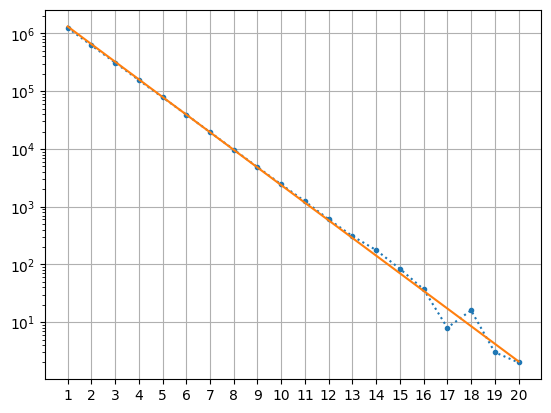

In [12]:
from collections import defaultdict
import os


def load_tosses() -> list[int]:
    FOLDER_NAME = 'files'; FILENAME = 'tosses.txt'
    # --- YOUR CODE HERE ---
    with open(os.path.join(FOLDER_NAME, FILENAME)) as f:
        return list(map(int, f.read().split()))
    # --- END OF YOUR CODE ---


def count_streaks(tosses: list[int]) -> dict[int, int]:
    '''
    Counts the number of streaks (same consecutive numbers) and return a dictionary length: number_of_streaks
    '''
    res = defaultdict(int)
    current_streak = 1
    prev_el = tosses[0]
    for el in tosses[1:]:
        if el != prev_el:
            res[current_streak] += 1
            current_streak = 1
        else:
            current_streak += 1
        prev_el = el
    res[current_streak] += 1
    return dict(res)

def _plot(res: dict[int, int]):
    from matplotlib import pyplot as plt
    import numpy as np
    n, S_n = zip(*sorted(res.items(), key=lambda x: x[0]))
    n_arr = np.array(n)
    S_n_arr = np.array(S_n)
    S_n_arr_log = np.log(S_n_arr)
    k, b = np.polyfit(n_arr, S_n_arr_log, deg=1)
    S_n_arr_fit = np.exp(b + k*n_arr)
    plt.plot(n_arr, S_n_arr, '.:')
    plt.plot(n_arr, S_n_arr_fit)
    plt.yscale('log')
    plt.xticks(n_arr)
    plt.grid()
    plt.show()

tosses = load_tosses()
res = count_streaks(tosses)
_plot(res)

In [ ]:
class PiSearcher:
    def __init__(self):
        with open('files/pi.txt', 'r') as f:
            self.pi = f.read()

    def search(self, substring) -> int:
        return self.pi.find(substring)

searcher = PiSearcher()
searcher.search('646')
searcher.search('123')
searcher.search('34')
searcher.search('9753')

In [ ]:
def lorem_ipsum():
    from collections import Counter
    alph_set = set('abcdefghijklmnopqrstuvwxyz')
    with open('files/lorem.txt', 'r') as f:
        s = f.read()
    c = Counter(s.lower())
    c_new = dict()
    for key, val in c.items():
        if key in alph_set:
            c_new[key] = val
    return c_new
lorem_ipsum()

{'l': 618,
 'o': 449,
 'r': 569,
 'e': 1194,
 'm': 550,
 'i': 1109,
 'p': 250,
 's': 932,
 'u': 990,
 'd': 313,
 't': 890,
 'a': 889,
 'c': 465,
 'n': 650,
 'g': 148,
 'q': 145,
 'f': 118,
 'v': 180,
 'b': 121,
 'x': 26,
 'h': 63,
 'j': 11}

In [ ]:
def triangle_sides() -> tuple[int, int]:
    with open('files/triangle_sides.txt') as f:
        a = [int(el.strip()) for el in f.readlines()]
    quantity = 0
    for sides in zip(a[:-2], a[1:-1], a[2:]):
        a, b, c = sorted(sides)
        if a**2 + b**2 > c**2:
            quantity += 1
    return quantity


In [ ]:
def maximum_duo_bruteforce():
    import numpy as np
    s1, s2 = np.loadtxt('files/signals.txt').astype(int).T
    max_ = -1
    for el1 in s1:
        for el2 in s2:
            if el1 * el2 % 14 == 0:
                max_ = max(max_, el1 * el2)
    return max_

def maximum_duo():
    import numpy as np
    s1, s2 = np.loadtxt('files/signals.txt').astype(int).T
    max_7 = [-1, -1]; max_2 = [-1, -1]; max_14 = [-1, -1]; max_ = [-1, -1]
    for el in zip(s1, s2):
        for i in range(2):
            if el[i] % 7 == 0 and el[i] > max_7[i]:
                max_7[i] = el[i]
            if el[i] % 2 == 0 and el[i] > max_2[i]:
                max_2[i] = el[i]
            if el[i] % 14 == 0 and el[i] > max_14[i]:
                max_14[i] = el[i]
            max_[i] = max(el[i], max_[i])
    return max(max_7[0]*max_2[1], max_7[1]*max_2[0], max_14[0]*max_[1], max_14[1]*max_[0])

maximum_duo()

In [20]:
# SKELETON SOLUTION: minecraft stats (json json json 1)
import json, os

def read_json() -> dict:
    '''
    Reads the .json file and returns a dict object
    '''
    FOLDER_NAME = 'files'; FILENAME = 'minecraft_stats.json'
    with open(os.path.join(FOLDER_NAME, FILENAME)) as f:
        data = json.load(f)
    return data['stats']

def remove_minecraft_colon(data: dict) -> dict:
    res = {}
    for k, v in data.items():
        new_k = k.replace('minecraft:', '')
        if isinstance(v, dict):
            res[new_k] = remove_minecraft_colon(v)
        else:
            res[new_k] = v
    return res

def min_max_stats(this_stats_data: dict) -> tuple[tuple[str, int], tuple[str, int]]:
    items = this_stats_data.items()
    return min(items, key=lambda x: x[1]), max(items, key=lambda x: x[1])

def display_stats(data: dict):
    for k, stats in data.items():
        if k == 'custom':
            continue
        min_, max_ = min_max_stats(stats)
        if min_[0] == max_[0]:
            continue
        print(f'{min_[0]} {k}: {min_[1]}; {max_[0]} {k}: {max_[1]}')

In [21]:
data = read_json()
data = remove_minecraft_colon(data)
display_stats(data)

iron_axe picked_up: 1; cobblestone picked_up: 557
enchanting_table used: 1; cobblestone used: 362
red_carpet mined: 1; netherrack mined: 314
ender_pearl dropped: 1; glass_bottle dropped: 31
air crafted: 0; wheat crafted: 920
fox killed: 1; zombie killed: 50


In [26]:
import os
from collections import defaultdict

Matches = list[tuple[str, str]]
PlayerMap = dict[str, str]
VicDefStatsDict = dict[str, list[int]]
VicDefStatsList = list[tuple[str, list[int]]]

def load_map() -> PlayerMap:
    FOLDER_NAME = 'files'; FILE_NAME = 'participants_map.txt'
    with open(os.path.join(FOLDER_NAME, FILE_NAME)) as f:
        return dict(map(str.split, f.readlines()))

def load_matches() -> Matches:
    FOLDER_NAME = 'files'; FILE_NAME = 'games.txt'
    with open(os.path.join(FOLDER_NAME, FILE_NAME)) as f:
        return list(map(str.split, f.readlines()))

def count_victories_defeats(matches: Matches) -> VicDefStatsDict:
    victories_defeats = defaultdict(lambda: [0, 0]) # [victories, defeats]
    for player1, player2 in matches:
        victories_defeats[player1][0] += 1
        victories_defeats[player2][1] += 1
    return victories_defeats

def convert_to_vic_def_list(vic_def_dict: VicDefStatsDict) -> VicDefStatsList:
    return list(vic_def_dict.items())

def best_win_rate(vic_def: VicDefStatsList, player_map: PlayerMap) -> tuple[str, float]:
    vic_def.sort(key=lambda x: x[1][0]/sum(x[1]), reverse=True)
    player_hash, wins_defeats = vic_def[0]
    return player_map[player_hash], wins_defeats[0]/sum(wins_defeats)

def most_and_least_matches(vic_def: VicDefStatsList, player_map: PlayerMap):
    vic_def.sort(key=lambda x: sum(x[1]))
    player_hash_most, wins_defeats_most = vic_def[-1]
    player_hash_least, wins_defeats_least = vic_def[0]
    return (player_map[player_hash_most], sum(wins_defeats_most)), (player_map[player_hash_least], sum(wins_defeats_least))

def get_monicas_hash(player_map: PlayerMap) -> str:
    # Monica
    for hash_, name in player_map.items():
        if name == 'Monica':
            return hash_

def get_monicas_performance(monicas_hash: str, vic_def_dict: VicDefStatsDict) -> tuple[int, int]:
    return tuple(vic_def_dict[monicas_hash])

def get_monicas_defeaters(monicas_hash: str, matches: Matches, player_map: PlayerMap) -> list[str]:
    return [player_map[player1] for player1, player2 in matches if player2 == monicas_hash]

player_map = load_map()
matches = load_matches()
vic_def_dict = count_victories_defeats(matches)
vic_def_list = convert_to_vic_def_list(vic_def_dict)
best = best_win_rate(vic_def_list, player_map)
most, least = most_and_least_matches(vic_def_list, player_map)
print(f'best player: {best[0]} with {best[1]:.3%} winrate')
print('most matches', *most)
print('least matches', *least)
monicas_hash = get_monicas_hash(player_map)
monicas_perf = get_monicas_performance(monicas_hash, vic_def_dict)
monicas_defeaters = get_monicas_defeaters(monicas_hash, matches, player_map)
print('monicas_perf: %d wins and %d losses' % monicas_perf)
print('defeaters:', ', '.join(monicas_defeaters))

best player: Aldric with 67.273% winrate
most matches Arrington 149
least matches Tauna 70
monicas_perf: 63 wins and 55 losses
defeaters: Shalayne, Kindel, Antonieta, Tong, Robina, Ladana, Daria, Annell, Lakina, Dinah, Viki, Laterrance, Karenann, Roselynn, Elis, Aide, Eboni, Jenean, Ladarian, Rome, Yedidya, Peter, Darik, Malcom, Adonica, Mallerie, Farris, Arek, Marquay, Zeina, Erving, Jerrett, Nour, Jasan, Hendy, Corey, Sherisse, Jonnell, Tyffany, Dylon, Shanicka, Latria, Rosalynn, Melandie, Melondy, Kemberly, Magin, Durell, Johnnell, Aysia, Jazzmen, Torris, Hellen, Ruth, Cephas


In [ ]:
import shutil
from datetime import datetime

def messy_experiments():
    OUTPUT_DIR = 'solution'
    FROM_DIR = 'rawdata'

    os.mkdir(OUTPUT_DIR)

    all_filenames = os.listdir(FROM_DIR)
    exp_filenames = [el for el in all_filenames if el.endswith('.exp')]
    info_filenames = [el for el in all_filenames if el.endswith('.info')]
    junk_filenames = [el for el in all_filenames if not (el.endswith('info') or el.endswith('.exp'))]

    os.mkdir(os.path.join(OUTPUT_DIR, 'junk'))

    for junk_file in junk_filenames:
        shutil.copy(
            os.path.join(FROM_DIR, junk_file),
            os.path.join(OUTPUT_DIR, 'junk')
        )

    info_dict = dict()
    num_name_not_spec = 0
    for info_file in info_filenames:
        tmp = dict()
        with open(os.path.join(FROM_DIR, info_file)) as fr:
            for line in fr.readlines():
                key, val = line.strip().split(': ')
                tmp[key] = val
        this_name = tmp.get('name', None)
        if this_name is None:
            this_name = f'notspec_{num_name_not_spec}'
            num_name_not_spec += 1
        info_dict[tmp['id']] = {
            'date_ts': int(tmp['date_ts']),
            'success': tmp['success'] == 'true',
            'name': this_name
        }

    exp_dict = dict()
    for exp_file in exp_filenames:
        with open(os.path.join(FROM_DIR, exp_file)) as fr:
            lines = fr.readlines()
            id_ = lines[0].strip().split(': ')[1]
            exp_dict[id_] = lines[2:]
    
    SUCC = os.path.join(OUTPUT_DIR, 'successful')
    UNSUCC = os.path.join(OUTPUT_DIR, 'unsuccessful')
    os.mkdir(SUCC)
    os.mkdir(UNSUCC)

    for key in exp_dict.keys():
        this_info = info_dict[key]
        this_exp = exp_dict[key]
        save_to = SUCC if this_info['success'] else UNSUCC
        with open(os.path.join(save_to, this_info['name']+'.exp'), 'w') as fw:
            print(f'id: {key}', file=fw)
            print(f'date: {datetime.fromtimestamp(this_info["date_ts"])}', file=fw)
            print(f'success: {"true" if this_info["success"] else "false"}', file=fw)
            print(file=fw)
            for line in this_exp:
                print(line, end='', file=fw)

    


In [59]:
import pickle
import os
import math


from datetime import datetime
from dataclasses import dataclass


@dataclass
class SensorData:
    '''
    time_stamp: Unix timestamp
    temperature: local air temperature in Celsius
    location: location as (latitude, longitude)
    '''
    time_stamp: float
    temperature: float
    location: tuple[float, float]
    
    def __lt__(self, other: 'SensorData') -> bool:
        return self.time_stamp < other.time_stamp

    def __str__(self) -> str:
        return f'({datetime.fromtimestamp(self.time_stamp)}) {self.temperature:.1f}C at lat={self.location[0]} lon={self.location[1]}'

SensorDataList = list[SensorData]

def load_all_sensor_data():
    FOLDER_NAME = 'files'; FILE_NAME = 'pickle_data.pickle'
    with open(os.path.join(FOLDER_NAME, FILE_NAME), 'rb') as f:
        return pickle.load(f)

def sort_by_time(sensor_data_list: SensorDataList):
    sensor_data_list.sort()

def coordinates_of_first_recording(sensor_data_list: SensorDataList) -> tuple[float, float]:
    return sensor_data_list[0].location
    
def get_filtered_temperatures(sensor_data_list: SensorDataList) -> SensorDataList:
    return list(filter(lambda sd: 20.0 < sd.temperature < 25.0, sensor_data_list))

def distance(loc1: tuple[float, float], loc2: tuple[float, float]) -> float:
    return math.sqrt((loc1[0] - loc2[0])**2 + (loc1[1] - loc2[1])**2)

def find_closest_sd(location: tuple[float, float], sensor_data_list: SensorDataList) -> SensorData:
    return min(sensor_data_list, 
               key=lambda sd: distance(sd.location, location))

def save_sensor_data(sensor_data_list: SensorDataList):
    SAVE_TO = 'sorted_sd.wtf'
    # --- YOUR CODE HERE ---
    with open(SAVE_TO, 'wb') as f:
        pickle.dump(sensor_data_list, f)
    # --- END OF YOUR CODE ---


# sd_list = load_all_sensor_data()
# sort_by_time(sd_list)
# first_rec_location = coordinates_of_first_recording(sd_list)
# print('first recording location:', first_rec_location)
# sd_list_filtered = get_filtered_temperatures(sd_list)
# LOC = (55.7557, 37.6419)
# closest_sd = find_closest_sd(location=LOC, sensor_data_list=sd_list_filtered)
# print(f'closest to {LOC} is {closest_sd}')
# save_sensor_data(sd_list_filtered)

first recording location: (55.756979, 37.683236)
closest to (55.7557, 37.6419) is (2023-04-22 05:12:43.500000) 21.9C at lat=55.755936 lon=37.643064


# Рекурсия

In [ ]:
def factorial(n: int) -> int:
    if n == 0 or n == 1:
        return 1
    return n * factorial(n-1)

In [ ]:
def digit_sum(n: int) -> int:
    if n < 10:
        return n
    return n % 10 + digit_sum(n // 10)

In [27]:
from functools import lru_cache

@lru_cache(maxsize=None)
def fib(n: int) -> int:
    if n in [0, 1]:
        return n
    return fib(n-1) + fib(n-2)

In [29]:
print(fib(100))

In [ ]:
def gcd(a: int, b: int) -> int:
    if a == b: return a
    if a > b: return gcd(a-b, b)
    return gcd(a, b-a)

In [ ]:
def continued_fraction_recursion(fraction, num=None, denom=None):
    if not fraction:
        return denom, num
    if num is None:
        num = 1
        denom = fraction.pop()
    return continued_fraction_recursion(fraction[:-1], denom, denom*fraction[-1] + num)

In [6]:
def digitalsum(a):
    return sum(map(int, str(a)))

def div_three(num):
    return div_three(digitalsum(num)) if num > 9 else num in {0, 3, 6, 9}

In [ ]:
def _flatten(A):
    res = []
    for el in A:
        if isinstance(el, (list, tuple)):
            yield from _flatten(el)
        else:
            yield el

def flatten(A):
    return list(_flatten(A))

def flatten_2(A):
    res = []
    for el in A:
        if isinstance(el, (list, tuple)):
            res.extend(flatten(el))
        else:
            res.append(el)
    return res

M = [
    [1,4,6],
    [2,1,7],
    [-4,1,-4]
]
A = [1, 5, [4, 6], [3, [6, 1, [4, 6], 2, [[5]]], [7, 9], 8]]
B = ['a', 'bc', ['de', ['fg', 'hke'], 'c', [[['agrt']]], 'qe']]
C = [[[[[1]]]]]
D = []

print(flatten(A))
print(flatten(B))


[1, 5, 4, 6, 3, 6, 1, 4, 6, 2, 5, 7, 9, 8]
['a', 'bc', 'de', 'fg', 'hke', 'c', 'agrt', 'qe']


In [ ]:
from itertools import product
def num_of_ways_bruteforce(num_of_dice, target, NUM_OF_SIDES=6):
    res = 0
    for sample in product(*(range(1, NUM_OF_SIDES+1) for _ in range(num_of_dice))):
        res += sum(sample) == target
    return res

from functools import lru_cache
@lru_cache(maxsize=None)
def num_of_ways(num_of_dice, target, NUM_OF_SIDES=6):
    '''
    Number of ways to get (num_of_dice) (NUM_OF_SIDES)-sided dice to sum up to (target)
    '''
    if num_of_dice == 1:
        if 1 <= target <= NUM_OF_SIDES:
            return 1
        return 0
    res = 0
    for i in range(1, NUM_OF_SIDES + 1):
        res += num_of_ways(num_of_dice - 1, target - i, NUM_OF_SIDES)
    return res

tests = [
    (2, 7),
    (1, 5),
    (1, 9),
    (1, 9, 9),
    (4, 10),
    (10, 28),
    (17, 58),
    (48, 101),
    (17, 58, 11)
]
for t in tests:
    print(t, num_of_ways(*t)) #, num_of_ways_bruteforce(*t))

(2, 7) 6
(1, 5) 1
(1, 9) 0
(1, 9, 9) 1
(4, 10) 80
(10, 28) 1972630
(17, 58) 929474534574
(48, 101) 27643934629475098630752097440
(17, 58, 11) 41598456130407


In [ ]:
list(product((1,2), (3,4)))

[(1, 3), (1, 4), (2, 3), (2, 4)]

# OOP

In [ ]:
class CoffeeMachine:
    def __init__(self, beans):
        self.beans = beans
        self.num_of_runs = 0
        print('coffee machine created')

    def __str__(self):
        return f'number of beans: {self.beans}, number of runs: {self.num_of_runs}'

    def add_beans(self, beans_to_add):
        assert beans_to_add > 0, 'Must be positive'
        self.beans += beans_to_add
        print(f'added {beans_to_add} beans')
        
    def grind(self):
        assert self.beans > 0, 'Not enough beans'
        self.beans -= 1
        self.num_of_runs += 1
        print('running...')


In [ ]:
class Card:
    def __init__(self, number: str, valid_until: str, money: int = 0) -> None:
        self.number = number
        self.valid_until = valid_until
        self.money = money
    def __str__(self):
        return f"Card(number={self.number}, valid until {self.valid_until}, ${self.money})"
    def is_valid(self) -> None:
        '''True if self.valid_until is after 02/23 (03/23 and on)'''
        m, y = map(int, self.valid_until.split('/'))
        if y > 23:
            return True
        elif y == 23:
            return m >= 3
        return False
    def add_money(self, amount) -> None:
        assert amount > 0, 'Must be positive'
        self.money += amount
    def get_money(self) -> int:
        return self.money

class CardHolder:
    def __init__(self, cards: list[Card]) -> None:
        self.cards = cards
    def are_all_valid(self) -> bool:
        assert self.cards, 'No cards'
        return all(map(Card.is_valid, self.cards))
    def total_money(self) -> int:
        return sum(map(Card.get_money, self.cards))
    def add_card(self, card: Card) -> None:
        self.cards.append(card)

In [ ]:
ch = CardHolder(cards=[])
ch.add_card(Card('36589', '03/23', 6))
print(ch.are_all_valid())
print(ch.total_money())

True
6


In [ ]:
from dataclasses import dataclass

@dataclass
class Task:
    task_id: int
    name: str
    priority: int # 1, 2, 3 - log, meduim, high
    completed: bool = False

class TodoApp:
    def __init__(self) -> None:
        self.tasks: list[Task] = []
    
    def add_task(self, task_id: int, name: str, priority: int):
        self.tasks.append(Task(task_id, name, priority))
    
    def complete_task(self, task_id: int):
        for t in self.tasks:
            if t.task_id == task_id:
                assert not t.completed, 'Task is already completed'
                t.completed = True
                return
        assert False, 'There is no task with this id' 
    
    def __str__(self):
        tmp = [f'{t.task_id}.{t.name}({"!"*t.priority})' for t in self.tasks if not t.completed]
        return ' '.join(tmp) if tmp else 'no tasks'

In [ ]:
app = TodoApp()
app.add_task(0, 'a', 1)
app.add_task(2, 'cg', 2)
app.add_task(4, 'ba', 3)
app.add_task(3, 'ef', 2)
print(app)

0.a(!) 2.cg(!!) 4.ba(!!!) 3.ef(!!)


In [ ]:
app = TodoApp()
app.add_task(1, 'Cook', 3)
app.add_task(2, 'Shower', 2)
app.add_task(3, 'Homework', 1)
print(app)
app.complete_task(1)
print(app)
app.complete_task(2)
app.complete_task(3)
print(app)

1.Cook(!!!) 2.Shower(!!) 3.Homework(!)
2.Shower(!!) 3.Homework(!)
no tasks


In [ ]:
app = TodoApp()
app.add_task(0, 'Eat', 3)
print(app)
app.complete_task(0)
print(app)
app.complete_task(0)

0.Eat(!!!)
no tasks


AssertionError: Task is already completed

In [ ]:
class Student:
    def __init__(self, name, age) -> None:
        self.name = name
        self.age = age
        self.assignments = []
        self.score = 0
        print('created student')
    
    def __str__(self):
        assignments_str = f', assignments={",".join(self.assignments)}' if self.assignments else ''
        age_str = 'age' if self.age < 18 else 'AGE'
        return f'name={self.name}, {age_str}={self.age}, score={self.score}{assignments_str}'
    
    def get_score(self):
        return self.score

    def add_assignment(self, assignment_name):
        self.assignments.append(assignment_name)
        print(f'added assignment {assignment_name}')
    
    def complete_first_assignment(self):
        assert self.assignments, 'There are no assignments'
        first_assignment = self.assignments.pop(0)
        self.score += len(first_assignment)
        print('completed the first assignment:', first_assignment)
    
    def complete_all_assignments(self):
        for a in self.assignments:
            self.score += len(a)
            print(f'completed {a}')

In [ ]:
class MyCounter:
    def __init__(self, obj):
        self.obj = obj
        res = {v: 0 for v in set(self.obj)}
        for el in self.obj:
            res[el] += 1
        self._res = res
        self._sorted = None
        print('mycounter object created')
    
    def as_dict(self):
        return self._res
    
    def at(self, el):
        return self._res.get(el, 0)
    
    def most_common(self, N=None):
        if self._sorted is None:
            self._sorted = sorted(self._res.items(), key=lambda x: x[1], reverse=True)
        if N is None:
            return self._sorted
        return self._sorted[:N]


In [ ]:
from string import ascii_lowercase, ascii_uppercase
import random
import math

class PasswordGen:
    @staticmethod
    def letter_lower() -> str:
        return random.choice(ascii_lowercase)

    @staticmethod
    def letter_upper() -> str:
        return random.choice(ascii_uppercase)

    @staticmethod
    def digit() -> str:
        return str(random.randrange(10))

    def random_special(self) -> str:
        return random.choice(self.special)

    def __init__(self, template: str, special='!@#$%^&*()[]{}_') -> None:
        self.template = template
        self.special = special
        self.generators = {
            'w': self.letter_lower,
            'W': self.letter_upper,
            'd': self.digit,
            's': self.random_special
        }
        self.lengths = {
            'w': 26,
            'W': 26,
            'd': 10,
            's': len(self.special)
        }
    
    def __call__(self) -> str:
        return self.one()

    def one(self) -> str:
        return ''.join([self.generators[el]() if el in self.generators.keys() else el for el in self.template])
    
    def many(self, n: int = 100) -> list[str]:
        return [self.one() for _ in range(n)]
    
    def __abs__(self) -> int:
        return math.prod((self.lengths.get(el, 1) for el in self.template))

In [ ]:
gen = PasswordGen('wdsdW', special='.,:')

In [ ]:
abs(gen)

202800

In [ ]:
from math import gcd

class Fraction:
    def __init__(self, num: int, denom: int):
        if not denom:
            raise ZeroDivisionError('Cannot have a 0 in the denominator')
        common = gcd(num, denom)
        self.num = num // common
        self.denom = denom // common
    def __repr__(self):
        return f'Fraction({self.num}, {self.denom})'
    def __str__(self):
        return f'{self.num}/{self.denom}'
    def __mul__(self, other):
        return Fraction(self.num * other.num, self.denom * other.denom)
    def __add__(self, other):
        return Fraction(self.num * other.denom + self.denom * other.num, self.denom * other.denom)
    def __sub__(self, other):
        return Fraction(self.num * other.denom - self.denom * other.num, self.denom * other.denom)
    def __truediv__(self, other):
        return self * other.inv()
    def __eq__(self, other):
        return self.num == other.num and self.denom == other.denom
    def __gt__(self, other):
        return self.val() > other.val()
    def val(self) -> float:
        return self.num / self.denom
    def inv(self):
        return Fraction(self.denom, self.num)
    

In [ ]:
import math

class Vec2:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y
    def __repr__(self) -> str:
        return f'Vec2({self.x:.3f}, {self.y:.3f})'
    def __str__(self) -> str:
        return f'[{self.x:.3f} {self.y:.3f}]'
    def __add__(self, other: "Vec2") -> "Vec2":
        return Vec2(self.x + other.x, self.y + other.y)
    def __sub__(self, other: "Vec2") -> "Vec2":
        return Vec2(self.x - other.x, self.y - other.y)
    def __mul__(self, other: float) -> "Vec2":
        return Vec2(self.x * other, self.y * other)
    def __truediv__(self, other: float) -> "Vec2":
        return Vec2(self.x / other, self.y / other)
    def __eq__(self, other) -> bool:
        diff = self - other
        return abs(diff.x) < 1e-5 and abs(diff.y) < 1e-5
    def __abs__(self) -> float:
        return math.sqrt(self.x**2 + self.y**2)
    def __matmul__(self, other) -> float:
        return self.x * other.x + self.y * other.y
    def __iter__(self) -> tuple[float, float]:
        yield self.x
        yield self.y
    def __xor__(self, other) -> float:
        return math.acos(self @ other / (abs(self) * abs(other)))
    
    

# Other